In [2]:
# Load needed libraries
import pandas as pd
import sklearn.linear_model
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install -U pandasql
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())

# Load in the Airbnb data
# Data source: http://insideairbnb.com/get-the-data.html
listings = pd.read_csv('/Users/TT/Desktop/4 Intro Data Analysis and Viz/Data in Colab/listings_LON.csv')
listings_detailed = pd.read_csv('/Users/TT/Desktop/4 Intro Data Analysis and Viz/Data in Colab/listings_detailed_LON.csv')                        
    
# Load in housing price data from real estate site                          
london_prices = pd.read_csv('/Users/TT/Desktop/4 Intro Data Analysis and Viz/Data in Colab/London_property_prices.csv')

pd.set_option('display.max_columns', None)

In [8]:
# First looking at the table
mysql("""

SELECT *
FROM listings
LIMIT 3

""")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Holiday London DB Room Let-on going,54730,Alina,None,Islington,51.56802,-0.11121,Private room,65,1,21,2011-09-13,0.17,2,359,0,None
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,None,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,75,3,89,2019-08-10,0.80,1,153,0,None
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,None,Westminster,51.52195,-0.14094,Entire home/apt,307,4,43,2019-11-02,0.35,15,322,1,None


In [9]:
# First looking at the table
mysql("""

SELECT *
FROM listings_detailed
LIMIT 3

""")

,id,listing_url,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",within a few hours,100%,89%,f,LB of Islington,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Islington,51.56802,-0.11121,Private room in rental unit,Private room,2,1 shared bath,1.0,0.0,"[""Pack \u2019n Play/travel crib"", ""Fire exting...",65,1,29,1.0,1.0,29.0,29.0,1.0,29.0,t,24,54,84,359,21,0,0,2011-07-11,2011-09-13,4.85,4.79,4.84,4.79,4.89,4.63,4.74,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,Bright Chelsea Apartment. Chelsea!,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom",within an hour,71%,40%,f,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Microwave"", ""Cable TV"",...",75,3,50,3.0,3.0,50.0,50.0,3.0,50.0,t,18,33,63,153,89,0,0,2012-07-16,2019-08-10,4.79,4.84,4.88,4.87,4.82,4.93,4.73,f,1,1,0,0,0.80
2,17402,https://www.airbnb.com/rooms/17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,https://www.airbnb.com/users/show/67564,Liz,2010-01-04,"Brighton and Hove, England, United Kingdom",within a few hours,77%,72%,f,Fitzrovia,18.0,18.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2 baths,3.0,3.0,"[""Microwave"", ""Elevator"", ""Dishwasher"", ""Washe...",307,4,365,3.0,4.0,365.0,365.0,3.8,365.0,t,2,23,47,322,43,1,0,2011-09-18,2019-11-02,4.69,4.80,4.68,4.66,4.66,4.85,4.59,f,15,15,0,0,0.35


In [10]:
# First looking at the table
# Average sold and size data from a UK real estate website
# Distance from center approximated with google maps

mysql("""

SELECT *
FROM london_prices
LIMIT 3

""")

,neighbourhood,avg_sold_price,avg_price_kvm,percent_price_change,quantity_sold,distance_from_center
0,Barking and Dagenham,329616,3916.0,-1.44,729,20.8
1,Barnet,683649,7673.0,0.45,568,13.6
2,Bexley,414828,4587.0,4.03,3280,22.8


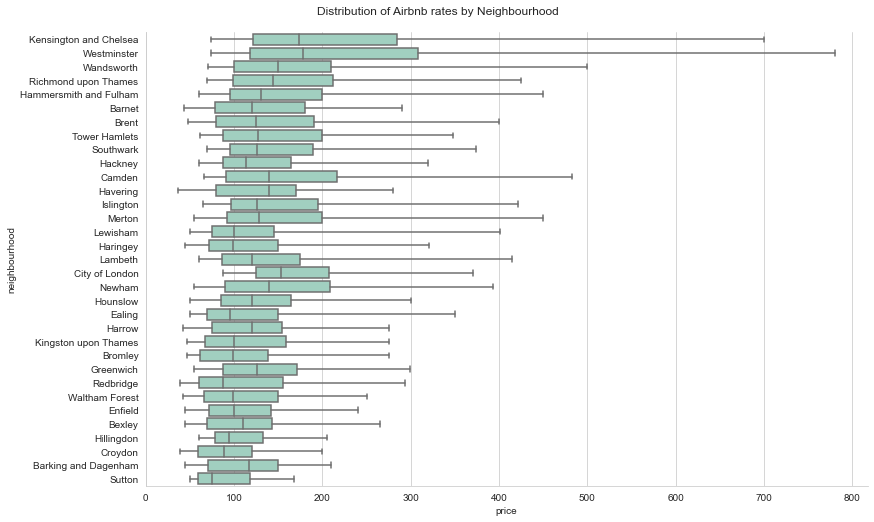

In [7]:
# Checking distribution of nightly rates (price) by neighbourhood

price_boxplotdata = mysql(
  """  
SELECT 
    price,
    neighbourhood
FROM listings
WHERE availability_365 != 0 --controlling for properties not currently in use and are blocked off on calendar
AND room_type = 'Entire home/apt' --only interested in entire properties
""")

# Setting the style with a grid
sns.set_style("whitegrid")

# Using 'sym' to exclude extreme outliers
# 'whis' of [5, 95] puts the whiskers between the 5th and 95th percentile of data
p = sns.catplot(x="price", y="neighbourhood", data=price_boxplotdata, kind="box", sym="", whis=[5, 95], height=7, aspect=7/4, color="#99D7C2")
p.fig.suptitle("Distribution of Airbnb rates by Neighbourhood", y=1.03)

plt.show()

In [39]:
# Average nightly rate per neighbourhood, by distance to center of London
# Hypothesis: Neighborhoods closer to the centre will have a higher average nightly rate.

rate_distance = mysql(
"""
SELECT
    listings.neighbourhood,
    round(avg(listings.price), 0) as avg_airbnb_rate,
    london_prices.distance_from_center
FROM listings
JOIN london_prices ON london_prices.neighbourhood = listings.neighbourhood
WHERE listings.room_type = 'Entire home/apt'
GROUP BY london_prices.neighbourhood
ORDER BY avg_airbnb_rate desc
""")

rate_distance

,neighbourhood,avg_airbnb_rate,distance_from_center
0,Westminster,285.0,1.5
1,City of London,258.0,2.8
2,Kensington and Chelsea,238.0,5.3
3,Richmond upon Thames,188.0,14.5
4,Greenwich,187.0,12.1
5,Brent,186.0,13.5
6,Wandsworth,181.0,7.9
7,Camden,181.0,3.8
8,Hammersmith and Fulham,179.0,8.2
9,Merton,178.0,14.3


,distance_from_center,avg_airbnb_rate
distance_from_center,1.000000,-0.630066
avg_airbnb_rate,-0.630066,1.000000


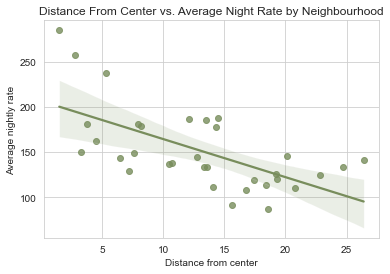

In [49]:
# Visualizing the relationship between airbnb rate and distance to center

sns.regplot(data=rate_distance, x='distance_from_center', y='avg_airbnb_rate', color='#788D5C')
plt.title('Distance From Center vs. Average Night Rate by Neighbourhood')
plt.xlabel('Distance from center')
plt.ylabel('Average nightly rate')

# Show correlation between the variables
rate_distance[['distance_from_center', 'avg_airbnb_rate']].corr()

# r is -0.63 (somewhat strong negative relationship)

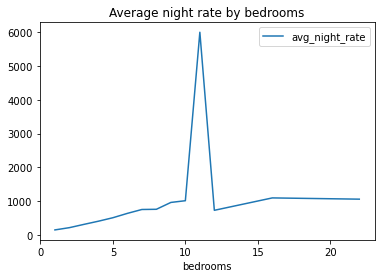

In [7]:
# Nightly rate by bedrooms
# Hypothesis: Positive correlation until a certain point - from financial perspective doesn't benefit investor above x bedrooms

bedroom_price = mysql(
"""
SELECT
    listings_detailed.bedrooms,
    round(avg(listings.price), 0) as avg_night_rate,
    count(*) as quantity
FROM listings
JOIN listings_detailed ON listings.id = listings_detailed.id
--where availability is not 0 so it avoids listings which the host has completely blocked
WHERE listings_detailed.availability_365 != 0
--only entire home/apt because other types were skewing it too much
AND listings_detailed.room_type = 'Entire home/apt'
AND bedrooms is not null 
GROUP BY listings_detailed.bedrooms

""")

bedroom_price.plot.line(y = "avg_night_rate", x = "bedrooms", title = "Average night rate by bedrooms")
bedroom_price.title = "title"

# Beyond 7 bedrooms, there is no increase in rate

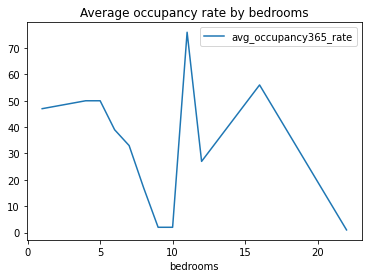

In [6]:
# Occupancy by bedroom
# Same Hypothesis as above: Positive correlation until a certain point - above a certain size occupancy stagnates because it isn't as desirable
occupancy_by_bedroom = mysql(
"""
with occupancy_beds as (
SELECT 
    listings_detailed.bedrooms,
    round((365 - listings_detailed.availability_365) * 100.0 / 365, 0) as occupancy_365days
FROM listings
JOIN listings_detailed on listings.id = listings_detailed.id
--where availability is not 0 so it avoids listings which the host has completely blocked
WHERE listings_detailed.availability_365 != 0
--only entire home/apt because other types were skewing it too much
AND listings_detailed.room_type = 'Entire home/apt'
AND bedrooms is not null 
)

SELECT 
    bedrooms,
    round(avg(occupancy_365days), 0) as avg_occupancy365_rate
FROM occupancy_beds
GROUP BY bedrooms

""")

occupancy_by_bedroom.plot.line(y = "avg_occupancy365_rate", x = "bedrooms", title = "Average occupancy rate by bedrooms")
occupancy_by_bedroom.title = "title"

# Increase in occupancy rates up til 5 bedrooms, beyond that it seems the demand is lower for bigger properties

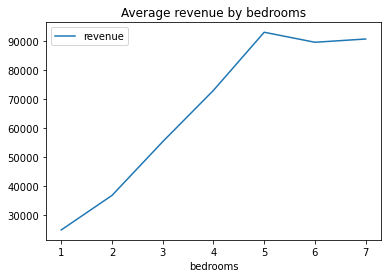

In [5]:
# Bedrooms by Revenue (Night rate x Occupancy)

bed_by_revenue = mysql(
"""
with bed_occ_and_night_rate as (
select 
    ld.bedrooms,
    round(avg(365 - l.availability_365),0) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
    and bedrooms is not null
--Filtering only entire hom because private room listings will show as 1bed places
    and l.room_type = 'Entire home/apt'
group by ld.bedrooms
)

select 
    bedrooms,
    round((occupied_days * avg_night_rate),0) as revenue,
    quantity
from bed_occ_and_night_rate
where bedrooms < 8.0

""")


bed_by_revenue.plot.line(y = "revenue", x = "bedrooms", title = "Average revenue by bedrooms")
bed_by_revenue.title = "title"

# Increase in average revenue up til 5 bedrooms, tapers off

In [ ]:
# “Revenue” x average purchase price

# Trying to calculate "revenue" by neighborhood
# Revenue = (occupancyrate365 x 365) x price
mysql(
"""
with revenue_calc as (
select 
    neighbourhood,
    round((365 - availability_365) * 1.0 / 365 * 1.0, 2) as occupancy_365days,
    price
from listings
where availability_365 != 0
),

occupied_days as (
select 
    neighbourhood,
    (occupancy_365days * 365) as number_days_occupied,
    price
from revenue_calc
),

end_metric_calc as (
select 
    neighbourhood,
    (number_days_occupied * price) as metric_revenue
from occupied_days
)


select
    end_metric_calc.neighbourhood,
    round(avg(metric_revenue), 0) as avg_revenue,
    london_prices.avg_sold_price
from end_metric_calc
--joining london prices to get the average sold price so we can make our ration of revenue:soldprice
join london_prices on london_prices.neighbourhood = end_metric_calc.neighbourhood
group by end_metric_calc.neighbourhood
order by avg_revenue desc

""")

,neighbourhood,avg_revenue,avg_sold_price
0,Westminster,37158.0,1096032
1,Kensington and Chelsea,34789.0,2289243
2,City of London,32305.0,877847
3,Camden,27141.0,1161864
4,Islington,27021.0,854485
5,Richmond upon Thames,24676.0,930687
6,Hammersmith and Fulham,24671.0,1000106
7,Wandsworth,24397.0,814465
8,Southwark,21566.0,715194
9,Hackney,20886.0,700560


In [56]:
# Find the average return on investment(ROI) by neighbourhood = (avg_revenue(occupancy x rate)/avg_sold_price)

mysql(
"""

with revenue_calc as (
select 
    neighbourhood,
    (365 - availability_365) * 1.0 / 365 * 1.0 as occupancy_365days,
    price
from listings
where availability_365 != 0
),

occupied_days as (
select 
    neighbourhood,
    (occupancy_365days * 365) as number_days_occupied,
    price
from revenue_calc
),

end_metric_calc as (
select 
    neighbourhood,
    (number_days_occupied * price) as metric_revenue
from occupied_days
),

rev_and_price as (
select
    london_prices.neighbourhood,
    round(avg(metric_revenue), 0) as avg_revenue,
    london_prices.avg_sold_price
from end_metric_calc
--joining london prices to get the average sold price so we can make our ration of revenue:soldprice
join london_prices on london_prices.neighbourhood = end_metric_calc.neighbourhood
group by london_prices.neighbourhood
)


select 
    rp.neighbourhood,
    round((rp.avg_revenue / rp.avg_sold_price), 5) as ROI
from rev_and_price as rp
order by ROI desc

""")



,neighbourhood,ROI
0,City of London,0.03689
1,Newham,0.03633
2,Hounslow,0.03538
3,Tower Hamlets,0.03462
4,Westminster,0.03390
5,Barking and Dagenham,0.03257
6,Kingston upon Thames,0.03188
7,Islington,0.03160
8,Brent,0.03088
9,Southwark,0.03017


In [31]:
# Of the properties owned by "super investors" where are they located? Where are there the most?
# A "super investor" is a host with more than 3 listings

mysql(
"""

with super_investor_property_count as (
select 
    neighbourhood,
    count(*) as listing_count
from listings
where calculated_host_listings_count > 3
and room_type = 'Entire home/apt'
group by neighbourhood
order by count(*) desc
),

cte as (
select 
    super_investor_property_count.neighbourhood,
    super_investor_property_count.listing_count,
    count(*) as total_listing_count
from super_investor_property_count
join listings on listings.neighbourhood = super_investor_property_count.neighbourhood
group by super_investor_property_count.neighbourhood
)

select 
    neighbourhood, 
    round(listing_count * 100.0 / total_listing_count, 0) as percent_of_listings_hosted_by_superinvestors
from cte
order by percent_of_listings_hosted_by_superinvestors desc


""")

,neighbourhood,percent_of_listings_hosted_by_superinvestors
0,City of London,50.0
1,Kensington and Chelsea,38.0
2,Westminster,38.0
3,Camden,28.0
4,Hammersmith and Fulham,18.0
5,Hillingdon,18.0
6,Havering,17.0
7,Hounslow,15.0
8,Tower Hamlets,15.0
9,Greenwich,14.0


In [ ]:
# Bathroom count by revenue (all neighbourhoods)

mysql(
"""
with bath_occ_and_night_rate as (
select 
    *,
    case when ld.bathrooms_text like '1 bath' then 1
        when ld.bathrooms_text like '1.5 baths' then 1.5
        when ld.bathrooms_text like '2 baths' then 2
        when ld.bathrooms_text like '2.5 baths' then 2.5
        when ld.bathrooms_text like '3 baths' then 3
        when ld.bathrooms_text like '4 baths' then 4
        when ld.bathrooms_text like '3.5 baths' then 3
        when ld.bathrooms_text like 'Half-bath' then 0.5
        when ld.bathrooms_text like '5 baths' then 5
        when ld.bathrooms_text like '4.5 baths' then 4.5
        when ld.bathrooms_text like '0 baths' then 0
        when ld.bathrooms_text like '6 baths' then 6
        when ld.bathrooms_text like '5.5 baths' then 5.5
        when ld.bathrooms_text like '10 baths' then 10
        when ld.bathrooms_text like '6.5 baths' then 6.5
        when ld.bathrooms_text like '17 baths' then 17
        when ld.bathrooms_text like '7.5 baths' then 7.5
        when ld.bathrooms_text like '10.5 baths' then 10.5
        when ld.bathrooms_text like '7 baths' then 7
        when ld.bathrooms_text like '12 baths' then 12
        when ld.bathrooms_text like '9 baths' then 9
        when ld.bathrooms_text like '8 baths' then 8
            end as bathroom_count,
    round(avg(365 - l.availability_365),0) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
    and bathrooms_text is not null
--FILTERING ONLY ENTIRE HOME BECAUSE PRIVATE ROOM BOOKINGS WILL SHOW AS 1 BEDROOM PLACES
    and l.room_type = 'Entire home/apt'
group by bathroom_count
)

select 
    bathroom_count,
    round((occupied_days * avg_night_rate),0) as revenue,
    quantity
from bath_occ_and_night_rate
where bathroom_count between 0.5 and 6


""")

,bathroom_count,revenue,quantity
0,0.5,6721.0,18
1,1.0,25971.0,12793
2,1.5,30148.0,1820
3,2.0,46881.0,3862
4,2.5,53840.0,831
5,3.0,85418.0,792
6,4.0,123004.0,132
7,4.5,111620.0,64
8,5.0,126496.0,35
9,5.5,117807.0,12


In [ ]:
# Bedroom + Bathroom by Revenue 

mysql(
"""
with bath_occ_and_night_rate as (
select 
    ld.bedrooms as bedrooms,
    case when ld.bathrooms_text like '1 bath' then 1
        when ld.bathrooms_text like '1.5 baths' then 1.5
        when ld.bathrooms_text like '2 baths' then 2
        when ld.bathrooms_text like '2.5 baths' then 2.5
        when ld.bathrooms_text like '3 baths' then 3
        when ld.bathrooms_text like '4 baths' then 4
        when ld.bathrooms_text like '3.5 baths' then 3
        when ld.bathrooms_text like 'Half-bath' then 0.5
        when ld.bathrooms_text like '5 baths' then 5
        when ld.bathrooms_text like '4.5 baths' then 4.5
        when ld.bathrooms_text like '0 baths' then 0
        when ld.bathrooms_text like '6 baths' then 6
        when ld.bathrooms_text like '5.5 baths' then 5.5
        when ld.bathrooms_text like '10 baths' then 10
        when ld.bathrooms_text like '6.5 baths' then 6.5
        when ld.bathrooms_text like '17 baths' then 17
        when ld.bathrooms_text like '7.5 baths' then 7.5
        when ld.bathrooms_text like '10.5 baths' then 10.5
        when ld.bathrooms_text like '7 baths' then 7
        when ld.bathrooms_text like '12 baths' then 12
        when ld.bathrooms_text like '9 baths' then 9
        when ld.bathrooms_text like '8 baths' then 8
            end as bathroom_count,
    round(avg(365 - l.availability_365),0) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
    and bathrooms_text is not null
    and bedrooms is not null
--FILTERING ONLY ENTIRE HOME BECAUSE PRIVATE ROOM BOOKINGS WILL SHOW AS 1 BEDROOM PLACES
    and l.room_type = 'Entire home/apt'
group by bedrooms, bathroom_count
)

select 
    bedrooms || ' + ' || bathroom_count as bed_bath_together,
    round((occupied_days * avg_night_rate),0) as revenue,
    quantity
from bath_occ_and_night_rate
where bathroom_count between 0.5 and 6
and quantity > 9


""")

,bed_bath_together,revenue,quantity
0,1.0 + 1,24527.0,7262
1,1.0 + 1.5,26773.0,841
2,1.0 + 2,36875.0,140
3,1.0 + 2.5,33636.0,12
4,2.0 + 1,31275.0,2938
5,2.0 + 1.5,30904.0,539
6,2.0 + 2,42435.0,2448
7,2.0 + 2.5,48990.0,270
8,2.0 + 3,48683.0,89
9,3.0 + 1,32011.0,390


In [ ]:
# Exploring neighbourhood and property type by revenue. Are specific property types better depending on neighbourhood?
mysql(
"""

with accommodates_cte as (
select 
    l.neighbourhood as neighbourhood,
    ld.property_type as property_type,
    avg(365 - l.availability_365) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
group by l.neighbourhood, ld.property_type
)

select 
    ac.neighbourhood,
    ac.property_type,
    round((ac.occupied_days * ac.avg_night_rate),0) as revenue,
    lp.avg_sold_price as avg_sold_price_of_neighbourhood,
    ac.quantity
from accommodates_cte as ac
join london_prices as lp on lp.neighbourhood = ac.neighbourhood
where property_type not like '%Private%'
and property_type not like '%Shared%'
and property_type not like '%Room%'
and property_type not like '%Boat%'
and quantity > 10
order by revenue desc




""")

,neighbourhood,property_type,revenue,avg_sold_price_of_neighbourhood,quantity
0,Westminster,Entire townhouse,115049.0,1096032,41
1,Kensington and Chelsea,Entire townhouse,98926.0,2289243,38
2,Kensington and Chelsea,Entire residential home,86621.0,2289243,168
3,Westminster,Entire residential home,83766.0,1096032,154
4,Islington,Entire townhouse,83164.0,854485,22
...,...,...,...,...,...
127,Barnet,Entire condominium (condo),12131.0,683649,58
128,Redbridge,Entire rental unit,11711.0,536876,66
129,Sutton,Entire rental unit,8918.0,498472,35
130,Brent,Entire guest suite,7479.0,618722,13


In [ ]:
# Looking at property type and revenue of the top 5 ROI neighbourhoods

mysql(
"""

with accommodates_cte as (
select 
    l.neighbourhood as neighbourhood,
    ld.property_type as property_type,
    avg(365 - l.availability_365) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
and property_type not like '%Private%'
and property_type not like '%Shared%'
and property_type not like '%Room%'
and l.neighbourhood = 'City of London'
or l.neighbourhood = 'Newham'
or l.neighbourhood = 'Hounslow'
or l.neighbourhood = 'Tower Hamlets'
or l.neighbourhood = 'Westminster'
group by l.neighbourhood, ld.property_type
)

select 
    neighbourhood,
    property_type,
    round((occupied_days * avg_night_rate),0) as revenue,
    quantity
from accommodates_cte
where quantity > 5


""")

,neighbourhood,property_type,revenue,quantity
0,City of London,Entire condominium (condo),28923.0,9
1,City of London,Entire rental unit,48152.0,134
2,City of London,Entire serviced apartment,33895.0,48
3,Hounslow,Entire condominium (condo),24885.0,27
4,Hounslow,Entire guest suite,13941.0,9
...,...,...,...,...
70,Westminster,Room in hotel,12525.0,117
71,Westminster,Room in serviced apartment,56811.0,29
72,Westminster,Shared room in bed and breakfast,1324.0,10
73,Westminster,Shared room in hostel,4950.0,16


In [ ]:
# Looking at bedroom count and revenue of the top 5 ROI neighbourhoods

mysql(
"""

with accommodates_cte as (
select 
    l.neighbourhood as neighbourhood,
    ld.bedrooms as bedroom_count,
    avg(365 - l.availability_365) as occupied_days,
    avg(l.price) as avg_night_rate,
    count(l.id) as quantity
from listings as l
join listings_detailed as ld on l.id = ld.id
where l.availability_365 != 0
and property_type not like '%Private%'
and property_type not like '%Shared%'
and property_type not like '%Room%'
and l.neighbourhood = 'City of London'
or l.neighbourhood = 'Newham'
or l.neighbourhood = 'Hounslow'
or l.neighbourhood = 'Tower Hamlets'
or l.neighbourhood = 'Westminster'
group by l.neighbourhood, ld.bedrooms
)

select 
    neighbourhood,
    bedroom_count,
    round((occupied_days * avg_night_rate),0) as revenue,
    quantity
from accommodates_cte
where quantity > 5
and bedroom_count is not null


""")

,neighbourhood,bedroom_count,revenue,quantity
0,City of London,1.0,41618.0,119
1,City of London,2.0,45543.0,45
2,Hounslow,1.0,19391.0,682
3,Hounslow,2.0,31694.0,161
4,Hounslow,3.0,57126.0,69
5,Hounslow,4.0,90080.0,41
6,Hounslow,5.0,85763.0,8
7,Newham,1.0,15881.0,1170
8,Newham,2.0,36841.0,271
9,Newham,3.0,47295.0,106
